# 1.7 – Fancy Indexing

In the previous sections, we saw how to access and modify portions of arrays using simple indices (e.g., ``arr[0]``), slices (e.g., ``arr[:5]``), and Boolean masks (e.g., ``arr[arr > 0]``).
In this section, we'll look at another style of array indexing, known as *fancy indexing*.
Fancy indexing is like the simple indexing we've already seen, but *we pass arrays of indices* in place of single scalars.
This allows us to very quickly access and modify complicated subsets of an array's values.

## Exploring Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.
For example, consider the following array:

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

**Important!** When using fancy indexing, the shape of the result reflects *the shape of the index arrays* rather than the shape of the *array being indexed*:

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind] # x[ind] is ind-shaped

array([[71, 86],
       [60, 20]])

**Your turn.** Access the first and the last entries of ``x`` using fancy indexing:

In [1]:
# write your code here



Fancy indexing also works in multiple dimensions. Consider the following array:

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the column:

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col] # picks X[0, 2], X[1, 1] and X[2, 3]

array([ 2,  5, 11])

Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
The pairing of indices in fancy indexing follows all the broadcasting rules that were mentioned in [Computation on Arrays: Broadcasting](L15_Computation_on_Arrays_Broadcasting.ipynb).
So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [8]:
X[row[:, np.newaxis], col] # = [[X[0,2],X[0,1],X[0,3]],[X[1,2],X[1,1],X[1,3]],[X[2,2],X[2,1],X[2,3]]]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.
For example:

In [9]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

Notice that this is simply the outer product of two vectors:

In [10]:
np.outer(row,col)

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

**Your turn.** Create a $10\times10$ array of integers from 0 to 99. Then use fancy indexing to print:
- the diagonal entries of this array,      i.e.,  0, 11, 22, ..., 99
- the "+1" diagonal entries of this array, i.e.,  1, 12, 23, ..., 89
- the "-2" diagonal entries of this array, i.e., 20, 31, 42, ..., 97
- the submatrix of doubly-even integers only, i.e., [[0, 2, ..., 8], ..., [80, 82, ..., 88]]
- column means and standard deviations of the submatrix obtained above.

In [2]:
# write your code here



In [12]:
ind = np.arange(10)
print(A[ind,ind])
print(A[ind[0:9],ind[0:9]+1])
print(A[ind[0:8]+2,ind[0:8]])

[ 0 11 22 33 44 55 66 77 88 99]
[ 1 12 23 34 45 56 67 78 89]
[20 31 42 53 64 75 86 97]


In [13]:
even = np.arange(0,10,2)
B=A[even[:,np.newaxis],even]
print(B)
print("column means:  ", B.mean(0))
print("column std dev:", np.round(B.std(0),2))

[[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]]
column means:   [40. 42. 44. 46. 48.]
column std dev: [28.28 28.28 28.28 28.28 28.28]


**Important!** Always remember that return value reflects the *broadcasted shape of the indices*, rather than the shape of the array being indexed.

## Combined Indexing

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [14]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy and simple indices:

In [15]:
X[2, [2, 0, 1]] # 2 is simple, [2, 0, 1] is fancy

array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [16]:
X[1:, [2, 0, 1]] # 1: is slicing, [2, 0, 1] is fancy

array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking:

In [17]:
mask = np.array([1, 0, 1, 0], dtype=bool) # = array([ True, False,  True, False])
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

**Your turn.** Create a $10\times10$ array of integers from 0 to 99. Then select the submatrix consisting of the last two rows and the odd (1, 3, ..., 9) columns, that is,
```
[[81 83 85 87 89]
 [91 93 95 97 99]]
```

In [3]:
# write your code here



## Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an $N \times D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [19]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Using the plotting tools we will discuss in [Part III](L31_Intro_to_Matplotlib.ipynb), we can visualize these points as a scatter-plot:

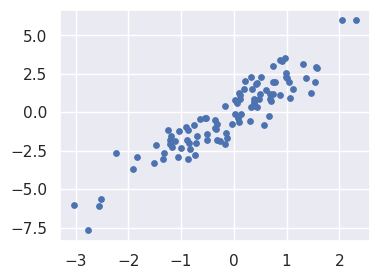

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], s=15);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [21]:
indices = np.random.choice(X.shape[0], 20, replace=False) # X.shape[0] = 100
indices

array([46, 21,  6, 32, 15, 47, 62, 85, 98, 70, 61, 45, 18, 11, 82,  3, 87,
       38, 56,  1])

In [22]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

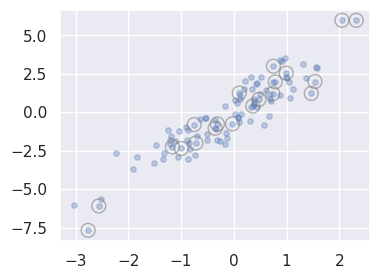

In [23]:
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolors='gray', s=100, alpha=0.6)
plt.show()

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models (see [Hyperparameters and Model Validation](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)), and in sampling approaches to answering statistical questions.

**Your turn.** Recall the polynomial fitting example from [1.3 – Computation on NumPy Arrays: Universal Functions](L13_Computation_on_Arrays_UFuncs.ipynb). Fit a straight line

$$
y = a x + b
$$

to the ``X`` data. Then compute the distance of each ``X`` point to the fitted line using

$$
d_i = \frac{|a x_i - y_i + b|}{\sqrt{a^2 + 1}}
$$
where $(x_i,y_i)$ is the coordinate of an ``X`` point, that is, think of ``X`` as 

$$
X = \begin{bmatrix} x_1 & y_1 \\ x_2 & y_2 \\ \vdots & \vdots \\ x_n & y_n \end{bmatrix}
$$

Select all the ``X`` points that are further away from the fitted line that three standard deviations of all distances. Then plot the fitted line, all the ``X`` points, and circle the selected points.

In [4]:
# write your code here



In statistical modelling, the distances between the data points and the fitted line are called *residuals*. The distribution of residuals is used to detect outlier data points and anomalies of the fitted model.

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array.
For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [27]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this. For example:

In [28]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [29]:
x = np.zeros(10) # = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Where did the 4 go? The result of this operation is to first assign ``x[0] = 4``, followed by ``x[0] = 6``.
The result, of course, is that ``x[0]`` contains the value 6.

Fair enough, but consider this operation:

In [30]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that ``x[3]`` would contain the value 2, and ``x[4]`` would contain the value 3, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because ``x[i] += 1`` is meant as a shorthand of ``x[i] = x[i] + 1``. ``x[i] + 1`` is evaluated, and then the result is assigned to the indices in ``x``.
With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you can use the ``at()`` method of ufuncs, and do the following:

In [31]:
x = np.zeros(10)
np.add.at(x, i, 1) # adds 1 at i = [2, 1, 8, 4] 
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The ``at()`` method does an in-place application of the given operator at the specified indices (here, ``i``) with the specified value (here, 1).
Another method that is similar in spirit is the ``reduceat()`` method of ufuncs, which you can read about in the NumPy documentation.

**Your turn.** Multiply ``x`` at ``j = [2,4,6]`` by 5 and print the result. (Answer: [ 0.  0.  5.  2. 15.  0.  0.  0.  0.  0.]
)

In [5]:
# write your code here



**Your turn.** Create a $10\times10$ array of integers from 0 to 99. Then use fancy indexing to:
- set all the even values to zero
- set all the odd values one

Then print the array to verify your work.

In [6]:
# write your code here



**Your turn.** Create a $10\times 10$ array of integers from 0 to 99. Then use fancy indexing to:
- set all the even values in even rows to zero
- set all the odd values in odd rows to zero
- set all the remaining values to eight

Then print the array to verify your work. 

Hint: create a subarray using slicing, then modify its values using fancy indexing. Here it's crucial that slicing does not create a new array.

In [7]:
# write your code here



## Example: Binning Data

You can use these ideas to efficiently bin data to create a histogram by hand.
For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins.
We could compute it using ``ufunc.at`` like this:

In [35]:
np.random.seed(42)
x = np.random.randn(100)

In [36]:
# compute a histogram by hand
# 1. create bins
bins = np.linspace(-5, 5, 20)
# 2. return an array of zeros with the same shape and type as a given array.
counts = np.zeros_like(bins)
(bins, counts)

(array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

In [37]:
# find the appropriate bin for each x
i = np.searchsorted(bins, x) # finds indices where elements should be inserted to maintain order.
print(i)

# add 1 to each of these bins
np.add.at(counts, i, 1)

print(counts)

[11 10 11 13 10 10 13 11  9 11  9  9 10  6  7  9  8 11  8  7 13 10 10  7
  9 10  8 11  9  9  9 14 10  8 12  8 10  6  7 10 11 10 10  9  7  9  9 12
 11  7 11  9  9 11 12 12  8  9 11 12  9 10  8  8 12 13 10 12 11  9 11 13
 10 13  5 12 10  9 10  6 10 11 13  9  8  9 12 11  9 11 10 12  9  9  9  7
 11 10 10 10]
[ 0.  0.  0.  0.  0.  1.  3.  7.  9. 23. 22. 17. 10.  7.  1.  0.  0.  0.
  0.  0.]


The counts now reflect the number of points within each bin–in other words, a histogram:

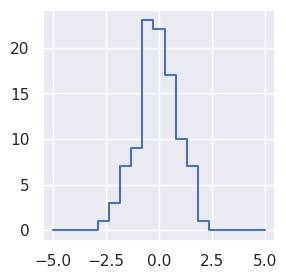

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot styling

plt.figure(figsize=(3, 3))
plt.plot(bins, counts, drawstyle='steps');

Of course, it would be silly to have to do this each time you want to plot a histogram.
This is why Matplotlib provides the ``plt.hist()`` routine, which does the same in a single line:

```python
plt.hist(x, bins, histtype='step');
```

This function will create a nearly identical plot to the one seen here.
To compute the binning, ``matplotlib`` uses the ``np.histogram`` function, which does a very similar computation to what we did before. Let's compare the two here:

In [39]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10.2 µs ± 19.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom routine:
6.7 µs ± 13.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be?
If you dig into the ``np.histogram`` source code (you can do this in IPython by typing ``np.histogram??``), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [40]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
57 ms ± 54.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
54.9 ms ± 80.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa (see [Big-O Notation](L18_Sorting.ipynb#Aside:-Big-O-Notation)).
But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors.
The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like ``np.histogram`` and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

## Exercises

**Exercise 1.7.1** Use broadcasting to create a $6 \times 6$ array filled with integers from 0 to 5 in the first row, from 10 to 15 in the second row, from 20 to 25 in the third row, and so on. Then reproduce the fancy indexing shown in the diagram below:

![figures/fancy.png](figures/fancy.png)

Hints: 

- for green indexing, use ``np.arange()`` to create individual indices
- for blue indexig, use row slicing
- for red indexing, use column slicing and boolean masking

In [8]:
# write your solution here



**Exercise 1.7.2** Create two samples of random integers from 0 to 9 of the same size. Then:
- Extract the coinciding values in both samples
- Remove the coinciding values from both samples

For example, if the two samples are
```
[2 2 3 9 3 8 5 5 3 4 7 4 0 2 2 2 3 6 5 2]
[4 0 0 9 8 6 8 5 7 4 3 0 3 8 6 8 4 5 0 2]
```
the coinciding values are
```
[9 5 4 2]
```
Removing these values gives
```
[2 2 3 3 8 5 3 7 4 0 2 2 2 3 6 5]
[4 0 0 8 6 8 7 3 0 3 8 6 8 4 5 0]

```

In [10]:
# write your solution here



**Exercise 1.7.3** The string ``.join()`` method in Python takes any sequence of strings as an argument and returns the combined string: 

In [46]:
letters = ["H","e","l","l","o"]
word = "".join(letters)  # here "" is the seperator string
print(word)

Hello


The ``""`` is the seperator string. It can be replaced with anything you like:

In [47]:
letters = ["H","e","l","l","o"]
word = " ".join(letters); print(word)  # empty space seperator
word = "-".join(letters); print(word)  # dash seperator

H e l l o
H-e-l-l-o


Use the string ``letters`` defined below and fancy indexing to print ``hello world!`` 

In [48]:
import string
letters = np.array(list(" "+string.ascii_lowercase+"!"))
print(letters)

[' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '!']


In [11]:
# write your solution here



**Exercise 1.7.4** Use fancy indexing to create a $5\times 5$ array filled with zeros and ones in the chessboard pattern, that is: 
```
[[0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]]
```

The use the ``plt.imshow()`` to display this array. (Use the code from Exercise 1.6.3 in [Notebook 1.6](L16_Boolean_Arrays_and_Masks.ipynb).)

In [12]:
# write your solution here



**Exercise 1.7.5** [Multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) $\mathcal{N}(\mu,\Sigma)$ is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions. The example below shows a two-dimensional histogram of a sample taken from the two-dimensional multivariate normal distribution with mean $\mu$ and covariance $\Sigma$

$$
\mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \qquad
\Sigma = \begin{bmatrix} 1 & 0.7 \\ 0.7 & 1 \end{bmatrix}
$$

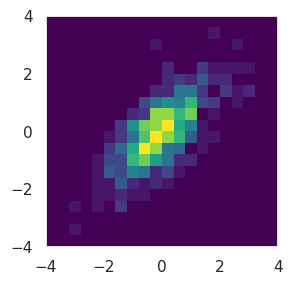

In [51]:
np.random.seed(1)
mean = [0, 0]  # mean
cov = [[1, 0.7], [.7, 1]]  # covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 500).T  # sample

plt.figure(figsize=(3, 3))
plt.hist2d(x, y, bins=20, range=[[-4,4],[-4,4]], cmap = "viridis")
plt.show()

Use code from the "Binning data" example to construct a two-dimensional histogram of ``x`` and ``y`` by hand. Note that ``x`` and ``y`` are coordinates of points on the plane. Thus you need construct a two-dimensional analogue of the ``counts`` variable in "Binning data" example. Then use ``plt.imshow()`` to display your two-dimensional counts.

In [13]:
# write your solution here



---

<!--NAVIGATION-->
< [1.6 – Boolean Arrays and Masks](L16_Boolean_Arrays_and_Masks.ipynb) | [Contents](../index.ipynb) | [1.8 – Sorting Arrays](L18_Sorting.ipynb) >


*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; also available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*